In [1]:
from time import gmtime, strftime

import numpy as np
from skimage import data

import webknossos as wk
from webknossos.dataset import COLOR_CATEGORY, SEGMENTATION_CATEGORY
from webknossos.dataset.properties import (
    DatasetViewConfiguration,
    LayerViewConfiguration,
)
import pickle
import lzma
import matplotlib.pyplot as plt
import sys

In [2]:
def main(dataset_dir, resolution, dataset_name) -> None:
  
    # Images should have the following dimensions: X, Y, Z
    with lzma.open(dataset_dir + "/" + "img.xz", "rb") as f:
      img = pickle.load(f)

    with lzma.open(dataset_dir + "/" + "segmentation.xz", "rb") as f:
      segmentation = pickle.load(f)
      
    with lzma.open(dataset_dir + "/" + "synapse.xz", "rb") as f:
      synapse = pickle.load(f)
    
    with lzma.open(dataset_dir + "/" + "overlap_neuron.xz", "rb") as f:
      overlap_neuron = pickle.load(f)
      # This has dimensions (z, y, x). Need to update to webknossos format (x, y, z)
      overlap_neuron = np.transpose(overlap_neuron, [2, 1, 0])

    # voxel_size is defined in nm
    ds = wk.Dataset(dataset_name, voxel_size=resolution)

    ds.default_view_configuration = DatasetViewConfiguration(zoom=1)

    # The example microscopy data has two channels
    # Channel 0 contains cell membranes, channel 1 contains nuclei.
    layer_img = ds.add_layer(
        "img",
        COLOR_CATEGORY,
        dtype_per_layer=img.dtype,
    )
    layer_img.add_mag(1, compress=True).write(img)

    layer_segmentation = ds.add_layer(
        "segmentation",
        SEGMENTATION_CATEGORY,
        dtype_per_layer=segmentation.dtype,
        largest_segment_id=int(segmentation.max()),
    )
    layer_segmentation.add_mag(1, compress=True).write(segmentation)

    layer_synapse = ds.add_layer(
        "synapse",
        COLOR_CATEGORY,
        dtype_per_layer=synapse.dtype,
    )
    layer_synapse.add_mag(1, compress=True).write(synapse)
    
    layer_overlap_neuron = ds.add_layer(
        "overlap_neuron",
        COLOR_CATEGORY,
        dtype_per_layer=overlap_neuron.dtype,
    )
    layer_overlap_neuron.add_mag(1, compress=True).write(overlap_neuron)

    remote_dataset = ds.upload()
    url = remote_dataset.url
    print(f"Successfully uploaded {url}")




In [3]:
main("/scratch/midway3/suryakalia/datasets/hanyu/p105", (6, 6, 40), "hanyu_p105_v6")

Output()

Successfully uploaded https://webknossos.org/datasets/56017e5aa5eb505d/hanyu_p105_v6


In [2]:
dataset_dir = "/scratch/midway3/suryakalia/datasets/hanyu/p105"
with lzma.open(dataset_dir + "/" + "img.xz", "rb") as f:
      img = pickle.load(f)

In [7]:
with lzma.open(dataset_dir + "/" + "segmentation.xz", "rb") as f:
      segmentation = pickle.load(f)

In [14]:
with lzma.open(dataset_dir + "/" + "synapse.xz", "rb") as f:
      synapse = pickle.load(f)

In [8]:
segmentation.shape

(1000, 1000, 100)

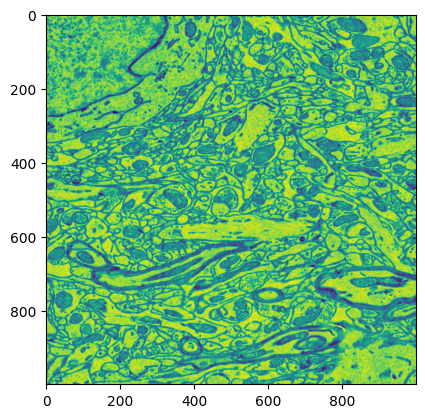

In [6]:
plt.imshow(img[:,:,0])

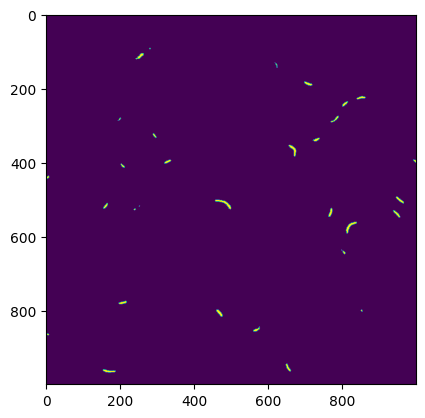

In [15]:
plt.imshow(synapse[:,:,0])

In [26]:
np.set_printoptions(threshold=sys.maxsize)
synapse.unique()

AttributeError: 'VolumeCutout' object has no attribute 'unique'